In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [ ]:
df = pd.read_csv("8-fraud_detection.csv")

In [3]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [4]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [5]:
df["is_fraud"].unique()

array([0, 1])

In [6]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [7]:
# inbalanced dataset 

In [8]:
df.isnull().sum()

transaction_amount        0
transaction_risk_score    0
is_fraud                  0
dtype: int64

In [9]:
X = df.drop("is_fraud", axis = 1)
y = df["is_fraud"]

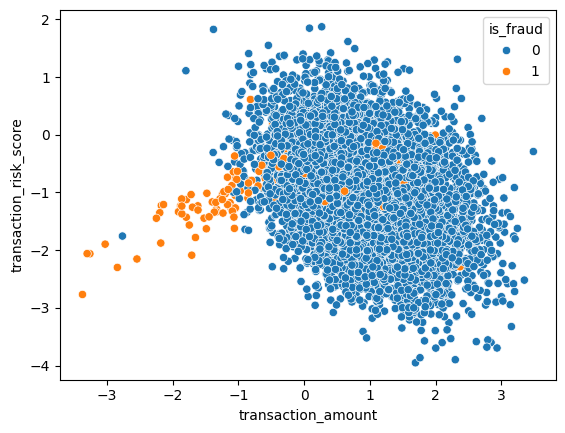

In [13]:
sns.scatterplot(x = X["transaction_amount"], y = X["transaction_risk_score"], hue = y)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=15)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
penalty = ["l1", "l2", "elasticnet"]
c_values = [100,10,1,0.1,0.01]
solver = ["newton-cg", "libfgs","liblinear", "sag","saga","newton-cholesky"]
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [19]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [20]:
params = dict(penalty = penalty, C = c_values, solver = solver, class_weight = class_weight)

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [22]:
cv = StratifiedKFold()

In [23]:
grid = GridSearchCV(estimator = model, param_grid=params, scoring = "accuracy", cv = cv)

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'libfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [26]:
y_pred = grid.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
print("score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))

score:  0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       0.84      0.42      0.56        38

    accuracy                           0.99      2500
   macro avg       0.92      0.71      0.78      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix: 
 [[2459    3]
 [  22   16]]


In [29]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [30]:
# roc, auc

In [37]:
model_probabilites = grid.predict_proba(X_test)

In [38]:
model_probabilites

array([[0.99586436, 0.00413564],
       [0.85287009, 0.14712991],
       [0.952308  , 0.047692  ],
       ...,
       [0.98898975, 0.01101025],
       [0.98454137, 0.01545863],
       [0.99758734, 0.00241266]])

In [39]:
model_probabilites = model_probabilites[:,1] # probabilities for the positive (fraud) class

In [40]:
model_probabilites

array([0.00413564, 0.14712991, 0.047692  , ..., 0.01101025, 0.01545863,
       0.00241266])

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
model_auc = roc_auc_score(y_test, model_probabilites)

In [43]:
model_auc

np.float64(0.7392898371029116)

In [45]:
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_probabilites)

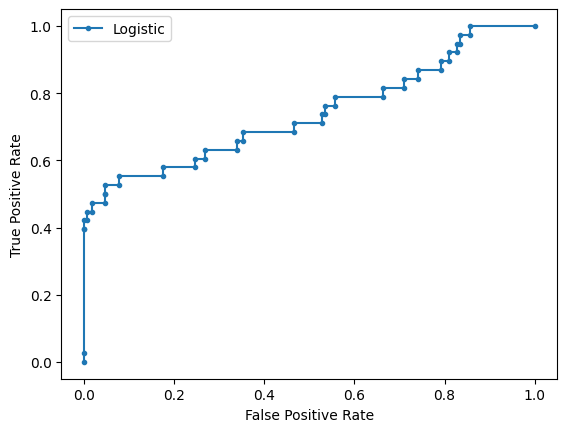

In [46]:
plt.plot(model_fpr, model_tpr, marker = ".", label = "Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

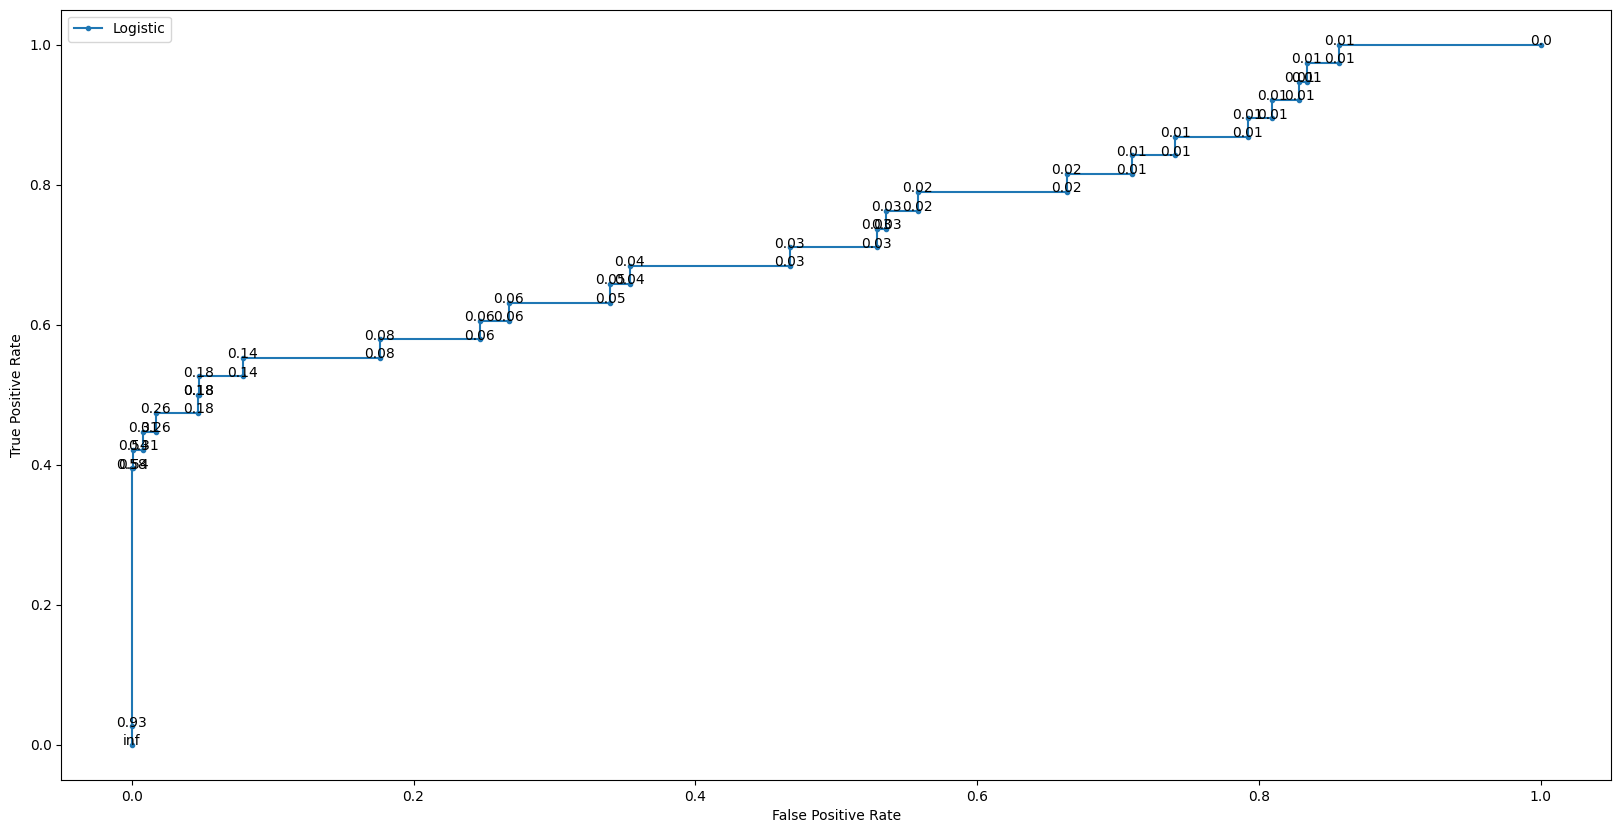

In [47]:
fig,ax = plt.subplots(figsize = (20,10))

ax.plot(model_fpr, model_tpr, marker = ".", label = "Logistic")

for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds): 
    ax.annotate(f"{np.round(thresh, 2)}", (fpr, tpr), ha = "center")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()